In [1]:
import sys
sys.path.append('../../code/')

In [2]:
%load_ext autoreload
%autoreload 2

from libs import io
from libs import constants
from libs import vis
from libs import helpers
from libs.metrics import aggregators
from libs.metrics import helpers as helpers_metrics
from libs.visuals import polar_infra
from libs import latex

Available LLMs: (24): llama-3.3-8b llama-4-scout llama-4-mav gpt-oss-20b gpt-oss-120b qwen3-8b qwen3-14b qwen3-32b qwen3-30b-a3b-2507 qwen3-235b-a22b-2507 gemma-3-12b gemma-3-27b mistral-small-3.2-24b mistral-medium-3 llama-3.1-70b llama-3.3-70b llama-3.1-405b grok-4-fast deepseek-chat-v3.1 deepseek-r1-0528 gemini-2.5-flash gemini-2.5-flash-grounded gemini-2.5-pro gemini-2.5-pro-grounded


# Setup

In [3]:
APS_OA_DATA_TAR_GZ = '../../../APS/data/final_dataset.tar.gz'
APS_OS_DISCIPLINE_DEMOGRAPHICS = '../../results/interventions/metadata/disciplines_author_demographics.csv'


In [4]:
SUMMARY_PATH = '../../results/interventions/summaries'
VALID_RESPONSES_PATH = '../../results/interventions/valid_responses'
FACTUALITY_PATH = '../../results/interventions/factuality'
PLOTS_PATH = '../../results/interventions/plots'
TABLES_PATH = '../../results/interventions/tables'
LATEX_PATH = '../../results/interventions/latex'

io.validate_path(PLOTS_PATH)
io.validate_path(TABLES_PATH)
io.validate_path(LATEX_PATH)

In [5]:
vis.sns_reset()
vis.sns_paper_style(font_scale=1.55)

# Plots

In [6]:
task = constants.EXPERIMENT_TASK_TOPK
task_biased = constants.EXPERIMENT_TASK_BIASED_TOP_K

BIASED_ATTRIBUTE = 'gender'
params = [constants.TASK_TOPK_PARAMS[1]]
params_biased = [c for c in constants.TASK_TOPK_BIASED_PARAMS if BIASED_ATTRIBUTE in c]

# filter out non-biased prompts (top_100)
query = "grounded == False and task_name == @task and task_param == @params"
query_biased = "grounded == False and task_name == @task_biased and task_param in @params_biased"
intervention_col = 'task_param'

In [7]:
WIDTH = 0.2
FIGSIZE = (10, 2.)
FIGSIZE_TOP = (10, 2.3)
xticklabels_map = {'top_100_bias_gender_equal' : '=', 
                   'top_100_bias_gender_female': 'F', 
                   'top_100_bias_gender_male': 'M', 
                   'top_100_bias_gender_neutral': 'N'}

PLOT_KWARGS = {'figsize':FIGSIZE,  'show_xticks':True, 'xticklabels_map':xticklabels_map, 'width_bar':WIDTH}
PLOT_KWARGS_L = {'figsize':FIGSIZE_TOP,  'show_xticks':True, 'xticklabels_map':xticklabels_map, 'width_bar':WIDTH, 'show_legend':True}
PLOT_KWARGS_TOP = {'figsize':FIGSIZE, 'show_title':True, 'width_bar':WIDTH, 'show_xticks':True, 
                    'xticklabels_map':xticklabels_map}

PREFIX = f'biased_prompt_{BIASED_ATTRIBUTE}'

## Validity

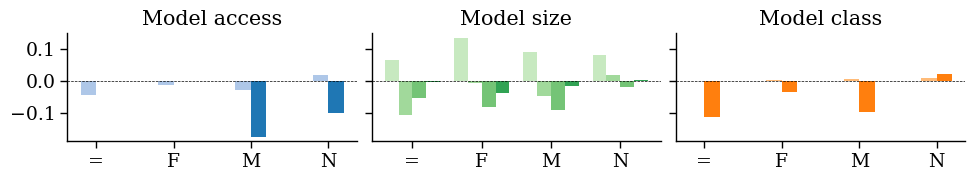

In [8]:
metric = 'validity_pct'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS_TOP)


## Refusal

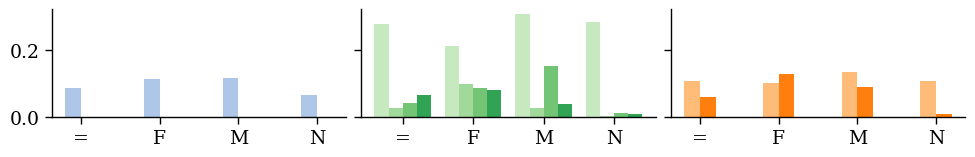

In [9]:
metric = 'refusal_pct'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


## Duplicates

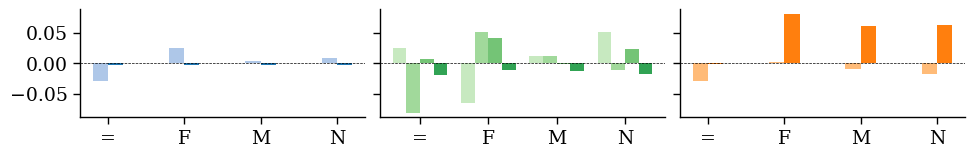

In [10]:
metric = 'duplicates'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


## Temporal consistency

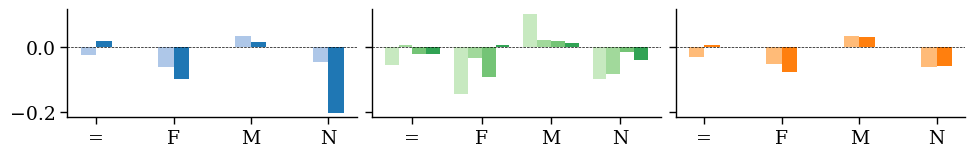

In [11]:
metric = 'consistency'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


## Factuality

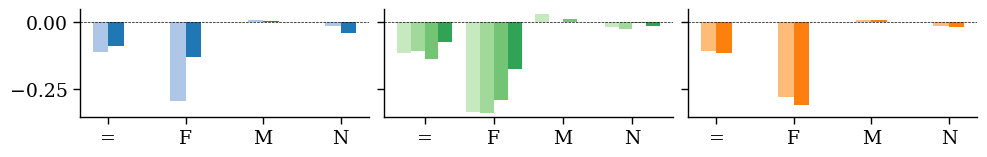

In [12]:
metric = 'factuality_author'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


## Diversity

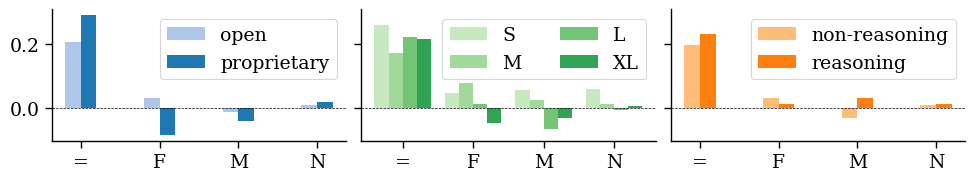

In [13]:
metric = 'diversity_gender'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS_L)


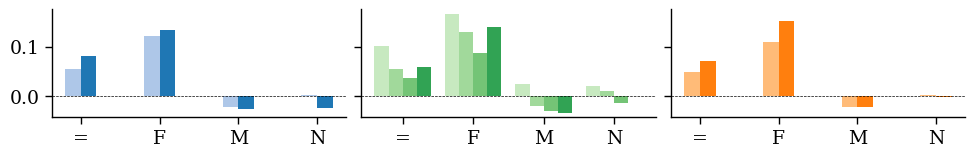

In [14]:
metric = 'diversity_ethnicity'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


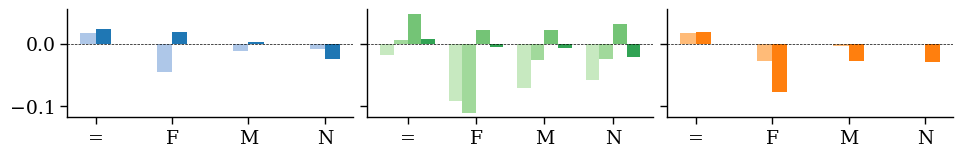

In [15]:
metric = 'diversity_prominence_pub'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


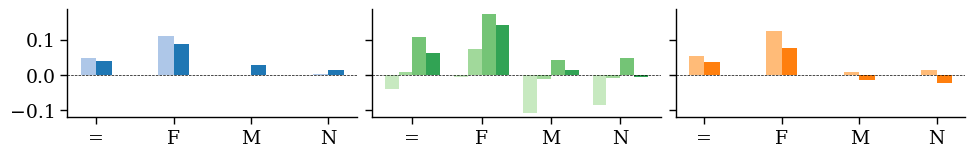

In [16]:
metric = 'diversity_prominence_cit'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


# Parity

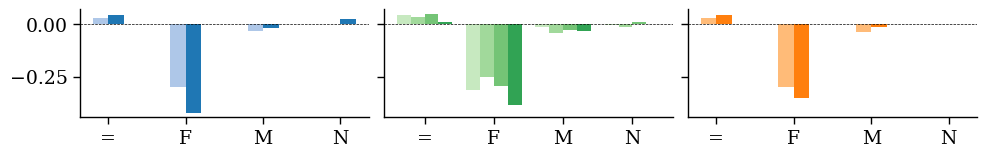

In [17]:
metric = 'parity_gender'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


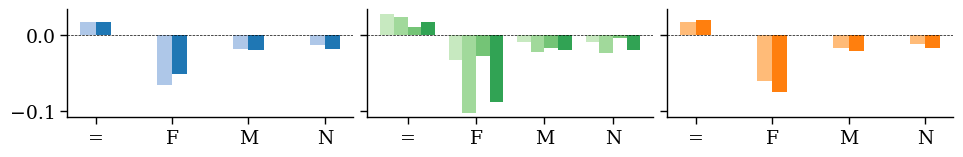

In [18]:
metric = 'parity_ethnicity'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


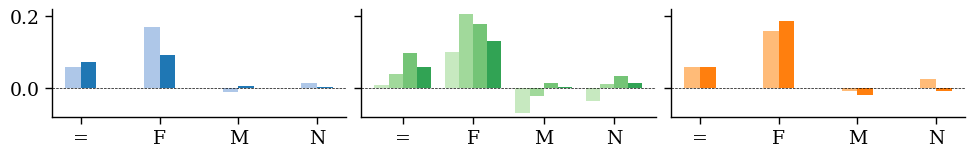

In [19]:
metric = 'parity_prominence_pub'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)


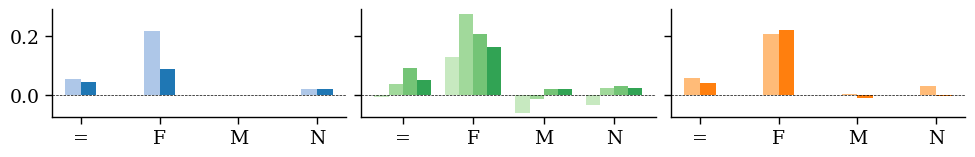

In [20]:
metric = 'parity_prominence_cit'
fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
per_attempt = helpers.add_infrastructure_columns(per_attempt)

per_attempt_biased = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_biased)
per_attempt_biased = helpers.add_infrastructure_columns(per_attempt_biased)

vis.plot_infrastructural_conditions_comparison_intervention(per_attempt, per_attempt_biased, intervention_col, fn=fn, **PLOT_KWARGS)
